In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from scipy.interpolate import griddata

In [2]:
dataset = pd.read_csv('model_input.csv', sep=';')
dataset

,sample,wt,J_norm,S_norm,Vp_anis,Vs1_anis,max_SWS,Vp_axial,Vp_trans,S_micas
0,PBT,0.730,7.14,1.11,22.0,21.3,22.3,18.37,6.20,1.52
1,ANL,0.726,4.08,0.80,24.0,22.4,22.8,22.29,2.71,1.10
2,IRO,0.705,6.36,1.17,24.5,26.2,26.5,22.85,3.25,1.66
3,WA,0.695,1.35,0.23,10.9,9.5,10.3,10.48,0.93,0.34
4,CA,0.679,9.58,1.38,28.8,29.9,30.2,27.99,1.61,2.04
5,RIM,0.644,5.65,0.81,17.2,7.0,13.0,7.61,13.26,1.25
6,OSO,0.631,8.94,1.32,26.2,26.8,27.3,25.31,0.81,2.09
7,EUP,0.599,9.66,1.28,23.6,26.1,26.5,22.71,1.62,2.14
8,GXE,0.588,17.01,1.61,23.1,27.1,27.9,21.88,1.42,2.74
9,RVS,0.485,6.32,1.00,19.3,15.9,16.8,15.88,6.36,2.06


# Calculate linear models

In [3]:
model = sm.OLS.from_formula('Vp_anis ~ S_norm + 0', dataset)

Vp_model = model.fit()
Vp_model.summary()

c:\Users\Marco\miniconda3\envs\main\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Vp_anis   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              300.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                    2.28e-10
Time:                        12:17:30   Log-Likelihood:                         -39.930
No. Observations:                  14   AIC:                                      81.86
Df Residuals:                      13   BIC:                                      82.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S_norm        19.5836      1.129     17.341      0.000      17.144      22.023
==============================================================================
Omnibus:                        2.655   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                0.772
Skew:                          -0.472   Prob(JB):                        0.680
Kurtosis:                       3.658   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
Vp_model.conf_int(1-0.68)

,0,1
S_norm,18.415901,20.751249


In [5]:
Vp_model.conf_int(1-0.95)

,0,1
S_norm,17.14386,22.02329


In [6]:
np.around(100 * (Vp_model.conf_int(1-0.95) - 19.5836) / 19.5836, 1)

,0,1
S_norm,-12.5,12.5


In [7]:
Vp_model.conf_int(1-0.997)

,0,1
S_norm,15.474095,23.693055


In [8]:
model = sm.OLS.from_formula('Vs1_anis ~ S_norm + 0', dataset)

Vs1_model = model.fit()
Vs1_model.summary()

c:\Users\Marco\miniconda3\envs\main\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Vs1_anis   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              353.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                    8.34e-11
Time:                        12:17:30   Log-Likelihood:                         -38.765
No. Observations:                  14   AIC:                                      79.53
Df Residuals:                      13   BIC:                                      80.17
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S_norm        19.5245      1.039     18.790      0.000      17.280      21.769
==============================================================================
Omnibus:                        3.210   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                1.325
Skew:                          -0.725   Prob(JB):                        0.516
Kurtosis:                       3.408   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
np.around(100 * (Vs1_model.conf_int(1-0.95) - 19.5245) / 19.5245, 1)

,0,1
S_norm,-11.5,11.5


In [10]:
model = sm.OLS.from_formula('max_SWS ~ S_norm + 0', dataset)

SWS_model = model.fit()
SWS_model.summary()

c:\Users\Marco\miniconda3\envs\main\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                max_SWS   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              520.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                    7.15e-12
Time:                        12:17:30   Log-Likelihood:                         -36.696
No. Observations:                  14   AIC:                                      75.39
Df Residuals:                      13   BIC:                                      76.03
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S_norm        20.4534      0.896     22.819      0.000      18.517      22.390
==============================================================================
Omnibus:                        0.104   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.320
Skew:                          -0.096   Prob(JB):                        0.852
Kurtosis:                       2.285   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
np.around(100 * (SWS_model.conf_int(1-0.95) - 20.4534) / 20.4534, 1)

,0,1
S_norm,-9.5,9.5


# Make plots

In [12]:
# Set Nature-like plots
import matplotlib as mpl

# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 21
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

Text(1.15, 0, 'y = 20.45x\n$R^2$ = 0.98')

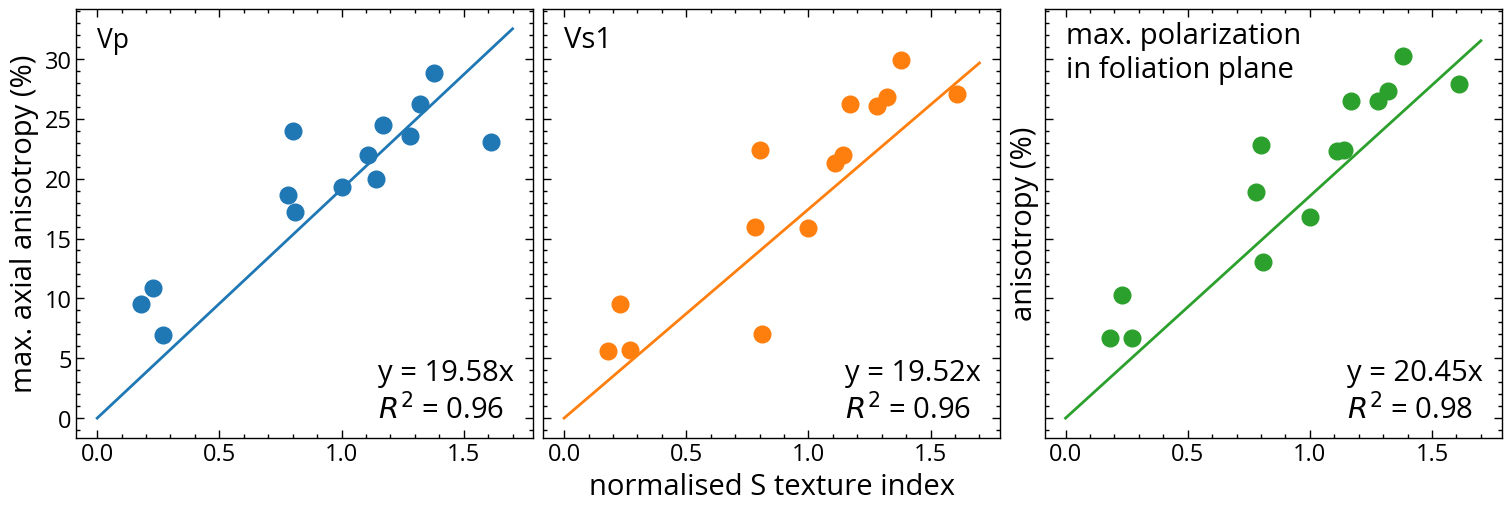

In [13]:
x = np.linspace(0, 1.7)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharey=True, constrained_layout=True)

ax1.plot(dataset['S_norm'], dataset['Vp_anis'], 'o', color='C0', label='Vp')
ax1.plot(x, 19.1253*x, linewidth=2, color='C0')
ax1.set_ylabel('max. axial anisotropy (%)')
ax1.text(0, 31, s='Vp', fontsize=19)
ax1.text(1.15, 0, s='y = 19.58x\n$R^2$ = 0.96', fontsize=21)

ax2.plot(dataset['S_norm'], dataset['Vs1_anis'], 'o', color='C1', label='Vs1')
ax2.plot(x, 17.4462*x, linewidth=2, color='C1')
ax2.set_xlabel('normalised S texture index')
ax2.text(0, 31, s='Vs1', fontsize=21)
ax2.text(1.15, 0, s='y = 19.52x\n$R^2$ = 0.96', fontsize=21)

ax3.plot(dataset['S_norm'], dataset['max_SWS'], 'o', color='C2', label='polarization')
ax3.plot(x, 18.5407*x, linewidth=2, color='C2')
ax3.set_ylabel('anisotropy (%)')
ax3.text(0, 28.5, s='max. polarization \nin foliation plane', fontsize=21)
ax3.text(1.15, 0, s='y = 20.45x\n$R^2$ = 0.98', fontsize=21)

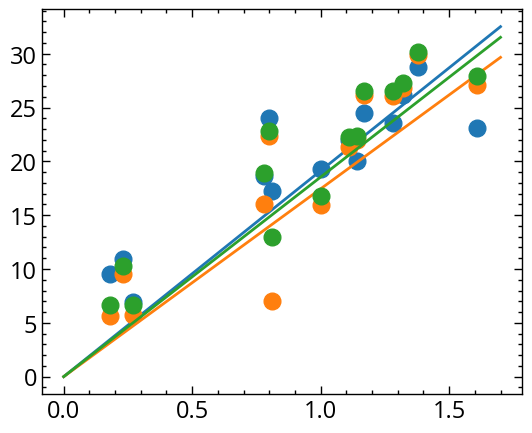

In [14]:
fig, ax = plt.subplots()

ax.plot(dataset['S_norm'], dataset['Vp_anis'], 'o', color='C0', label='Vp anisotropy')
ax.plot(x, 19.1253*x, linewidth=2, color='C0')

ax.plot(dataset['S_norm'], dataset['Vs1_anis'], 'o', color='C1', label='Vs1 anisotropy')
ax.plot(x, 17.4462*x, linewidth=2, color='C1')

ax.plot(dataset['S_norm'], dataset['max_SWS'], 'o', color='C2', label='SWS anisotropy')
ax.plot(x, 18.5407*x, linewidth=2, color='C2')

Text(0, 0.5, 'texture S index of micas')

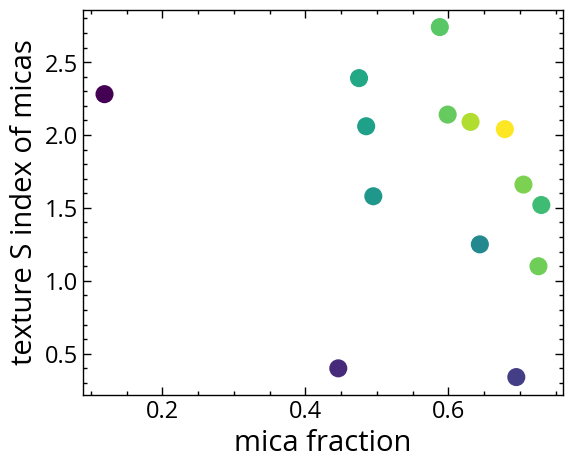

In [15]:
fig, ax = plt.subplots()

ax.scatter(dataset['wt'], dataset['S_micas'], c=dataset['Vp_anis'])
ax.set_xlabel('mica fraction')
ax.set_ylabel('texture S index of micas')

Text(0, 0.5, 'texture S index of micas')

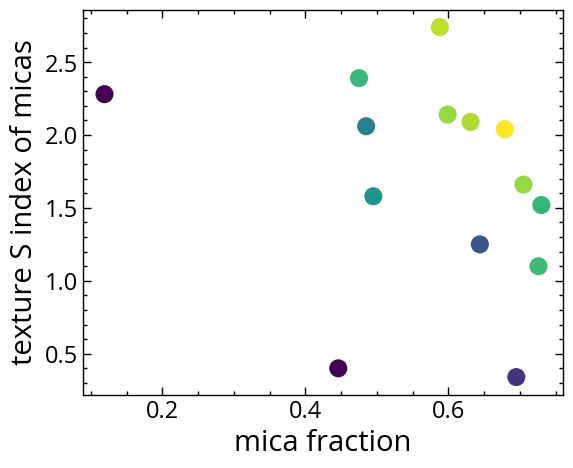

In [16]:
fig, ax = plt.subplots()

ax.scatter(dataset['wt'], dataset['S_micas'], c=dataset['max_SWS'])
ax.set_xlabel('mica fraction')
ax.set_ylabel('texture S index of micas')